# Group C4_7
## Classification
### Dataset name: Predict students' dropout and academic success
### Dataset link: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import iqr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
import tensorflow as tf

# Feature Analysis

In [ ]:
from google.colab import files
upload = files.upload()
data = pd.read_csv('data.csv')
data.columns = data.columns.str.strip()

Saving data.csv to data (1).csv


In [ ]:
data.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
data['Target'].value_counts()

 Graduate    2209
 Dropout     1421
 Enrolled     794
Name: Target, dtype: int64

<Axes: xlabel='Target', ylabel='count'>

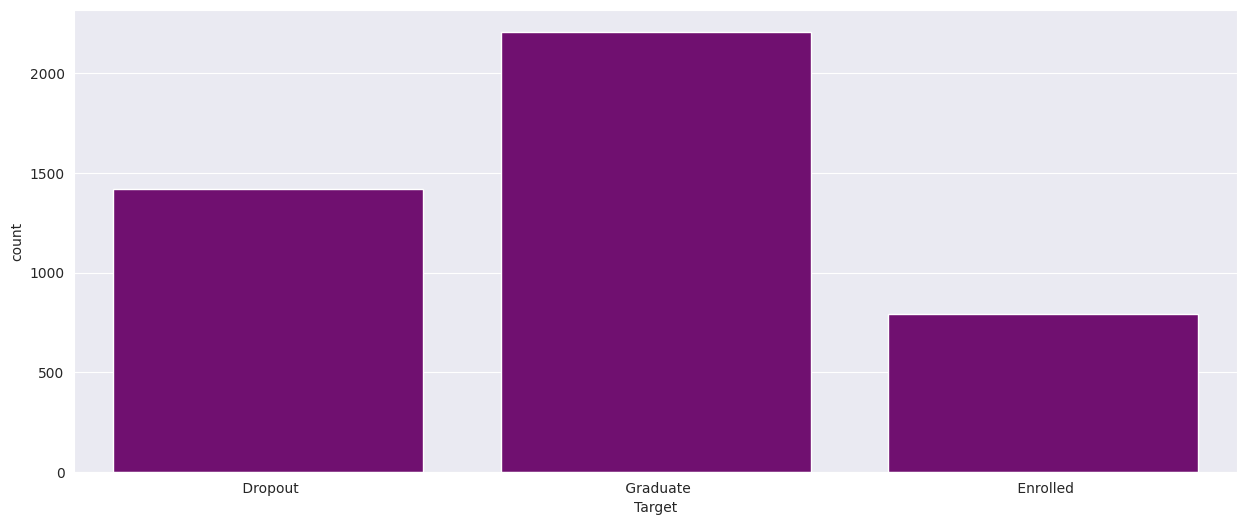

In [ ]:
sns.countplot(x="Target", data=data ,color='purple' )

<Axes: >

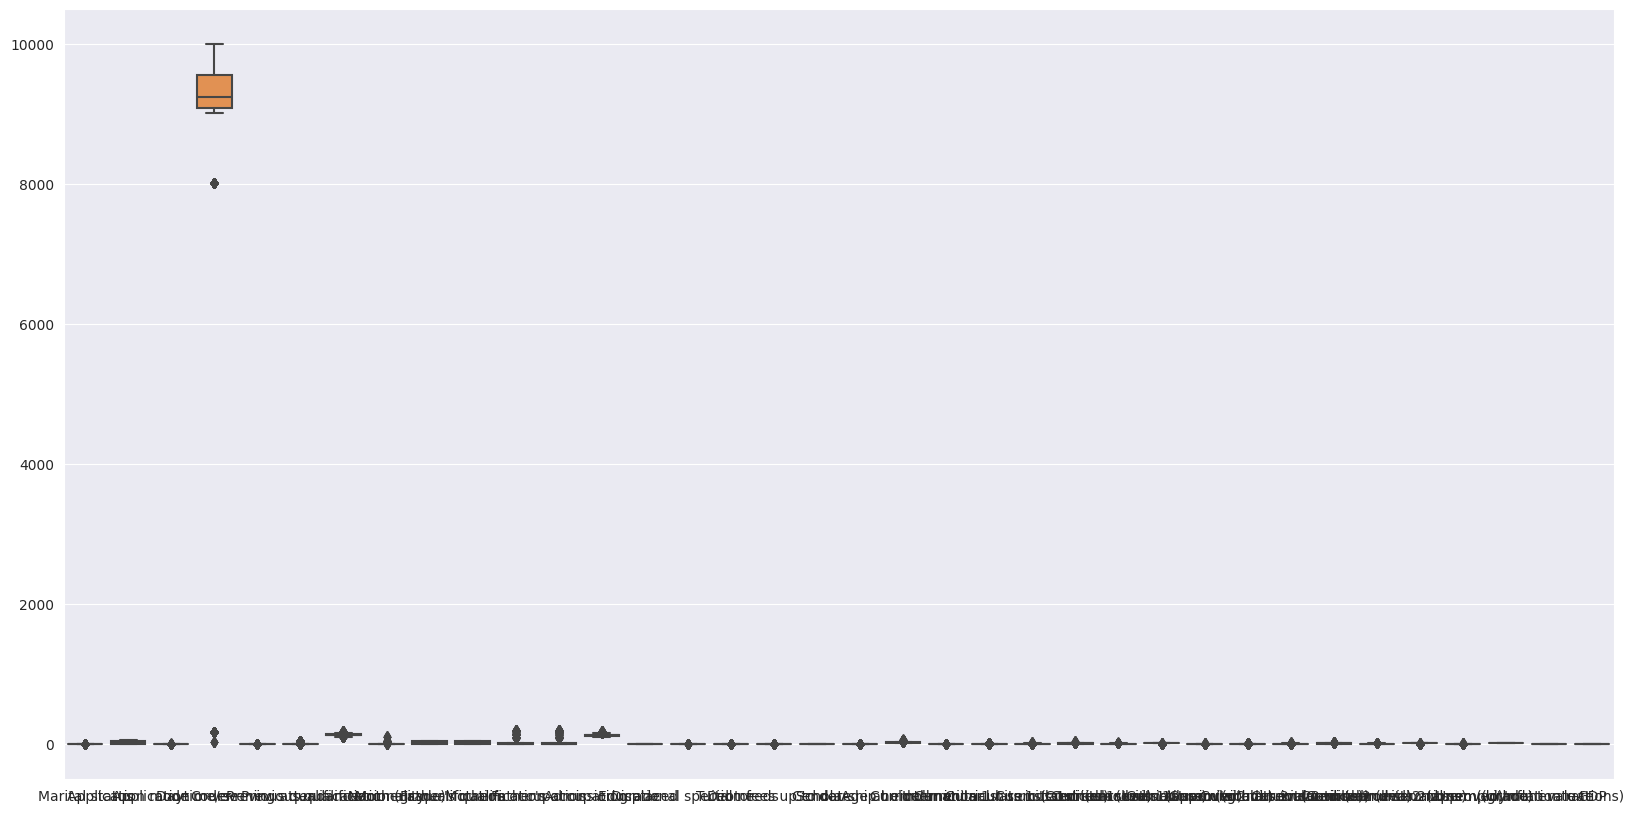

In [ ]:
fig,ax=plt.subplots(1,figsize=(20,10))
sns.boxplot(data=data.iloc[:, :],ax=ax)

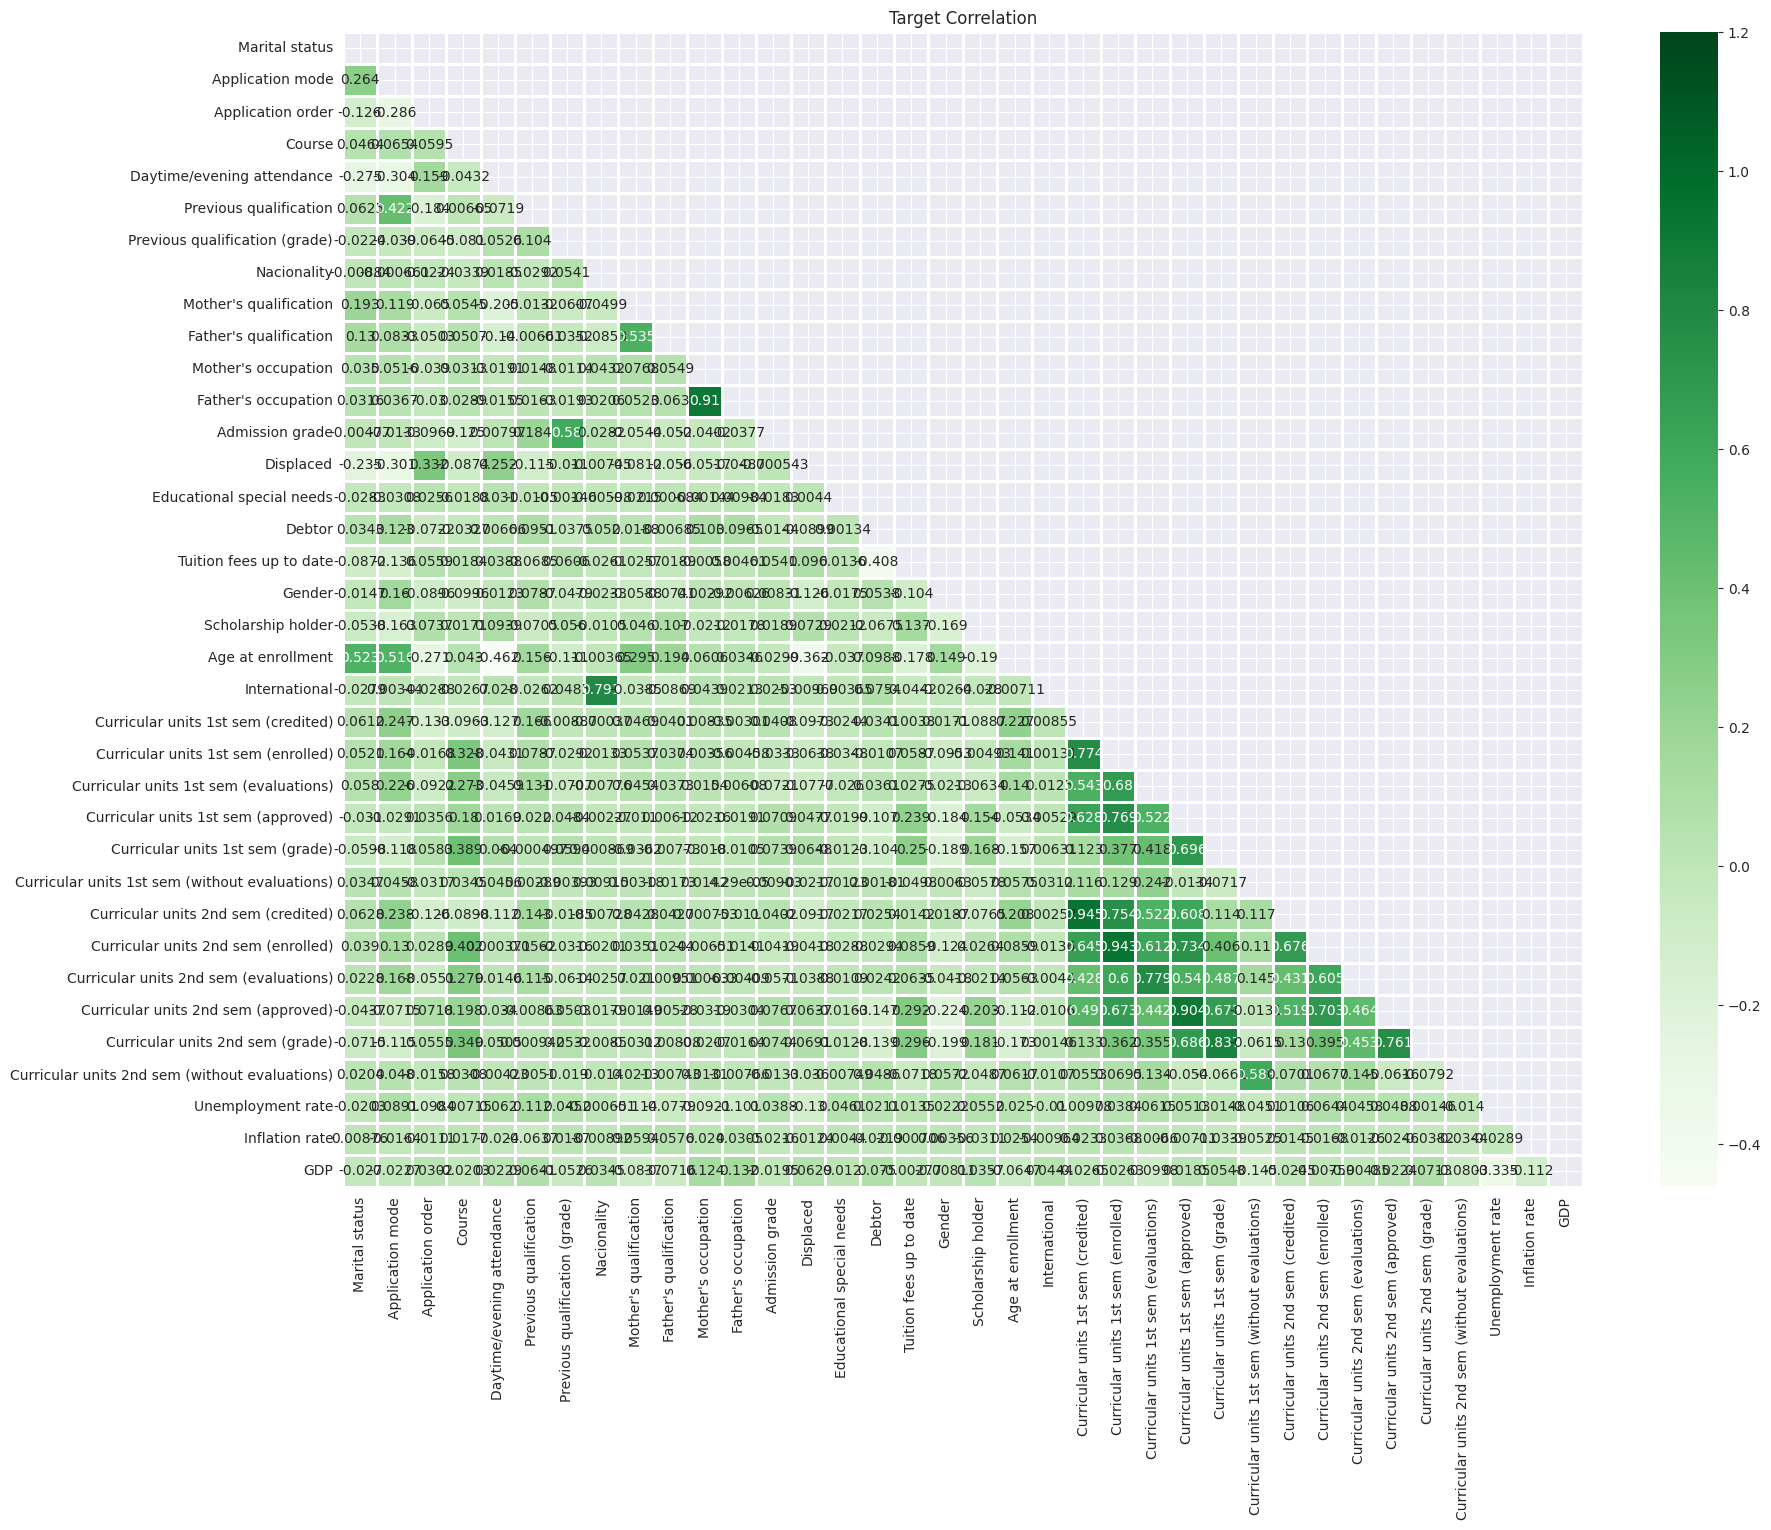

In [ ]:
# Creating a correlation matrix for the numerical features of the dataframe
numeric_df = data.select_dtypes(include=[np.number])
corrMatt = numeric_df.corr()
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20, 15))
plt.title('Target Correlation')
# Generate a custom diverging colormap
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap='Greens', mask=mask, ax=ax, annot=True, fmt='.3g', linewidths=1);

# Preprocessing

In [ ]:
# ENCODING THE TARGET COLUMN

In [ ]:
# Encode the "Target" column values and add them to a new column "Target_encoded"
label_encoder = LabelEncoder()
data['Target_encoded'] = label_encoder.fit_transform(data['Target'])
df = data.drop('Target', axis=1)

In [ ]:
# REMOVING OUTLIERS

In [ ]:
# Calculate the IQR of each feature
iqr = df.apply(iqr, axis=0)
# Detect any feature's data points that are more than 1.5 IQRs below the 15th or above the 85th percentile
outliers = data.loc[((df < (df.quantile(0.15) - 1.5 * iqr)) | (df > (df.quantile(0.85) + 1.5 * iqr))).any(axis=1)].index

# Remove the outliers
df.drop(outliers, inplace=True)

# Save the  data in a new csv file
df.to_csv('dropout_prediction_dataset_cleaned.csv', index=False)

In [ ]:
#Feature Normalization

<Axes: >

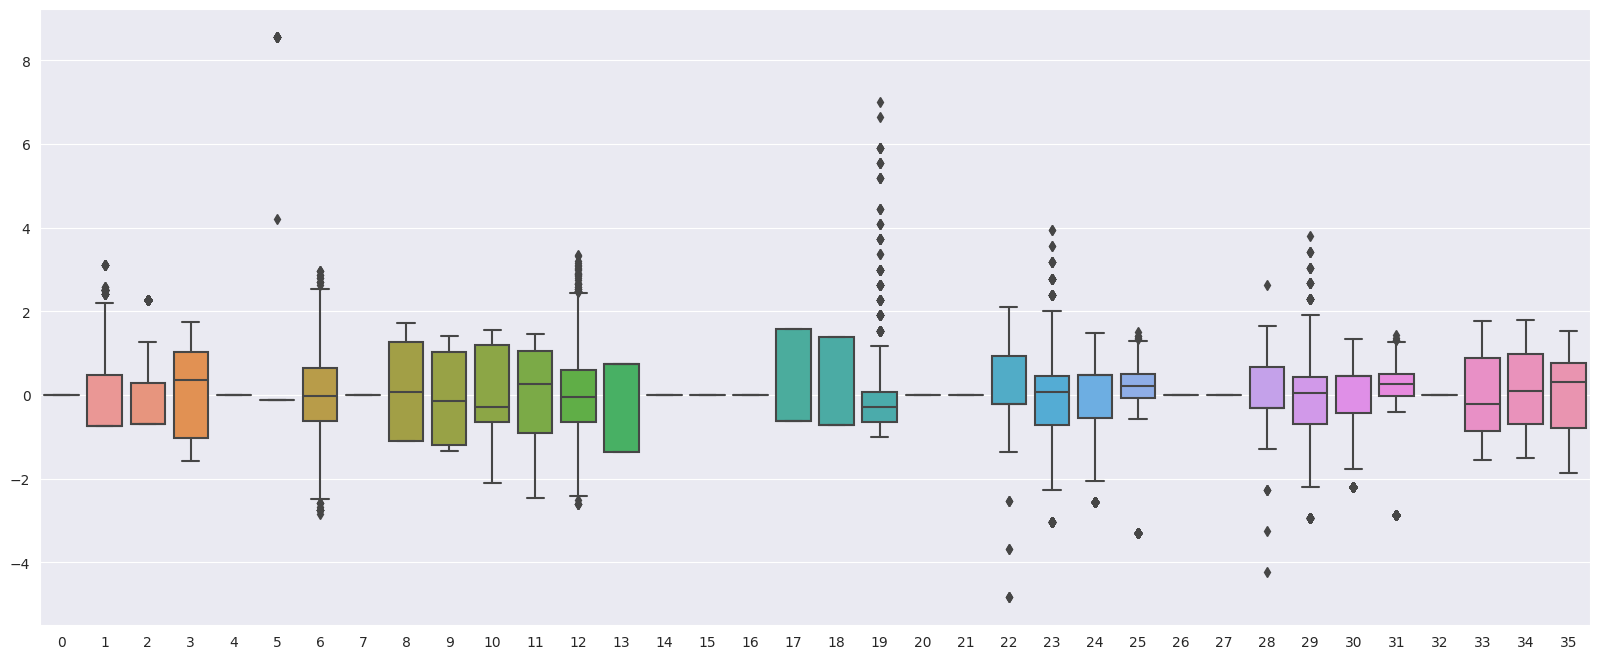

In [ ]:
# Assign features to X
X = df.drop('Target_encoded', axis=1)
# Normalise the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=Xs,ax=ax)

In [ ]:
# DIMENSIONALITY REDUCTION

In [ ]:
from sklearn.decomposition import PCA
feature_names = list(X.columns)
pca = PCA(n_components=10)
Xs_pca = pca.fit_transform(Xs)
PCA_df = pd.DataFrame()
PCA_df['PCA_1'] = Xs_pca[:,0]
PCA_df['PCA_2'] = Xs_pca[:,1]

In [ ]:
# VISUALIZATION OF PCA

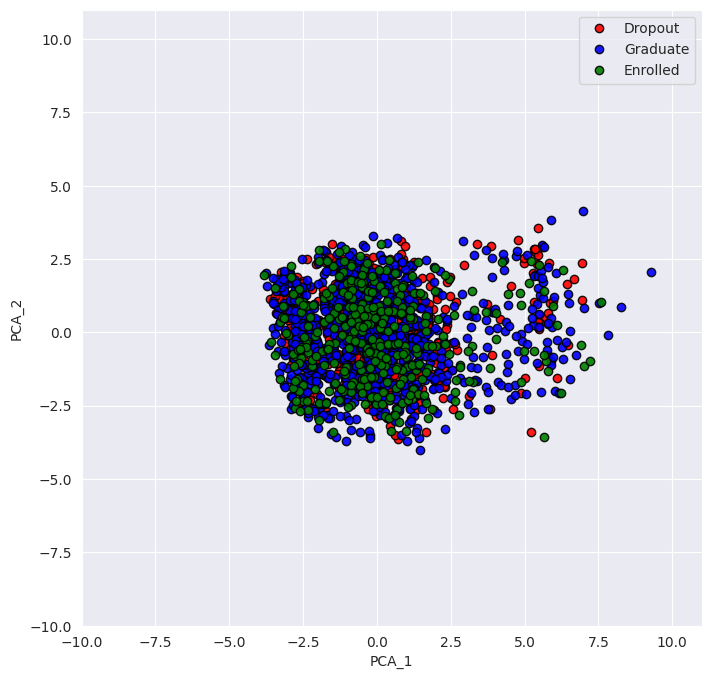

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(PCA_df['PCA_1'][data['Target_encoded'] ==0],PCA_df['PCA_2'][data['Target_encoded'] == 0],'ro', alpha = 0.9,markeredgecolor = 'k')
plt.plot(PCA_df['PCA_1'][data['Target_encoded'] ==2],PCA_df['PCA_2'][data['Target_encoded'] == 2],'bo', alpha = 0.9,markeredgecolor = 'k')
plt.plot(PCA_df['PCA_1'][data['Target_encoded'] ==1],PCA_df['PCA_2'][data['Target_encoded'] == 1],'go', alpha = 0.9,markeredgecolor = 'k')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.xlim([-10, 11])
plt.ylim([-10, 11])
plt.legend(['Dropout','Graduate', 'Enrolled'])
plt.show()

In [ ]:
# Constructing Training and Test Set

In [ ]:
y = df['Target_encoded']

In [ ]:
# SPLIT THE DATA INTO TRAINING AND TEST SET: 80%-20% RATIO IS USED FOR THE SPLIT
from sklearn.model_selection import train_test_split
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2,random_state=1, stratify=y)

# Models

In [ ]:
# Lists for saving K-FOLD and classification accuracy scores
score_list_kf = []
score_list_ca = []

# 1. Logistic Regression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(Xs_train, y_train)

LogisticRegression()

In [ ]:
# classification accuracy

classifier_score_lg = log_reg.score(Xs_test, y_test)
print('The classifier accuracy score is {:03.2f}'.format(classifier_score_lg))
score_list_ca.append(classifier_score_lg)

The classifier accuracy score is 0.80


In [ ]:
# k-fold

k_folds = KFold(n_splits = 5)
scores_lgreg = cross_val_score(log_reg, Xs_test, y_test, cv = k_folds)
score_list_kf.append(scores_lgreg.max())
print("Cross Validation Scores: ", scores_lgreg)
print("Average CV Score: ", scores_lgreg.mean())
print("Number of CV Scores used in Average: ",len(scores_lgreg))

Cross Validation Scores:  [0.74666667 0.8        0.8        0.76       0.73333333]
Average CV Score:  0.768
Number of CV Scores used in Average:  5


# 2. Support Vector Machine

In [ ]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC
clf = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', probability=True)
clf.fit(Xs_train, y_train)

SVC(gamma='auto', probability=True)

In [ ]:
# classification accuracy

classifier_score_svm = clf.score(Xs_test, y_test)
print('The classifier accuracy score is {:03.2f}'.format(classifier_score_svm))
score_list_ca.append(classifier_score_svm)

The classifier accuracy score is 0.81


In [ ]:
# k-fold

k_folds = KFold(n_splits = 5)
scores_svm = cross_val_score(clf, Xs_test, y_test, cv = k_folds)
score_list_kf.append(scores_svm.max())
print("Cross Validation Scores: ", scores_svm)
print("Average CV Score: ", scores_svm.mean())
print("Number of CV Scores used in Average: ",len(scores_svm))

Cross Validation Scores:  [0.74666667 0.84       0.78666667 0.77333333 0.72      ]
Average CV Score:  0.7733333333333332
Number of CV Scores used in Average:  5


# 3. Decision Tree

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(Xs_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [ ]:
# classification accuracy

classifier_score_tree = tree_clf.score(Xs_test, y_test)
print('The classifier accuracy score is {:03.2f}'.format(classifier_score_tree))
score_list_ca.append(classifier_score_tree)

The classifier accuracy score is 0.79


In [ ]:
#k-fold

k_folds = KFold(n_splits = 5)
scores_DT = cross_val_score(tree_clf, Xs_test, y_test, cv = k_folds)
score_list_kf.append(scores_DT.max())
print("Cross Validation Scores: ", scores_DT)
print("Average CV Score: ", scores_DT.mean())
print("Number of CV Scores used in Average: ",len(scores_DT))

Cross Validation Scores:  [0.70666667 0.84       0.8        0.8        0.76      ]
Average CV Score:  0.7813333333333332
Number of CV Scores used in Average:  5


# 4.  Multilayer Perceptron Neural Network.

In [ ]:
mlp_clf = MLPClassifier(random_state=1, max_iter=5000).fit(Xs_train, y_train)
mlp_clf.predict_proba(Xs_test)

array([[1.47327626e-04, 1.30515255e-03, 9.98547520e-01],
       [7.83529459e-01, 2.13692364e-01, 2.77817706e-03],
       [5.53811295e-03, 9.43519969e-02, 9.00109890e-01],
       ...,
       [1.44997994e-03, 9.98545682e-01, 4.33828776e-06],
       [1.83978378e-05, 1.25209938e-02, 9.87460608e-01],
       [1.58173715e-08, 4.63780714e-05, 9.99953606e-01]])

In [ ]:
# classification accuracy

classifier_score_mlp = mlp_clf.score(Xs_test, y_test)
print('The classifier accuracy score is {:03.2f}'.format(classifier_score_mlp))
score_list_ca.append(classifier_score_mlp)

The classifier accuracy score is 0.73


In [ ]:
# k-fold

k_folds = KFold(n_splits = 5)
scores_MLP = cross_val_score(mlp_clf, Xs_test, y_test, cv = k_folds)
score_list_kf.append(scores_MLP.max())
print("Cross Validation Scores: ", scores_MLP)
print("Average CV Score: ", scores_MLP.mean())
print("Number of CV Scores used in Average: ",len(scores_MLP))

Cross Validation Scores:  [0.74666667 0.74666667 0.77333333 0.74666667 0.73333333]
Average CV Score:  0.7493333333333333
Number of CV Scores used in Average:  5


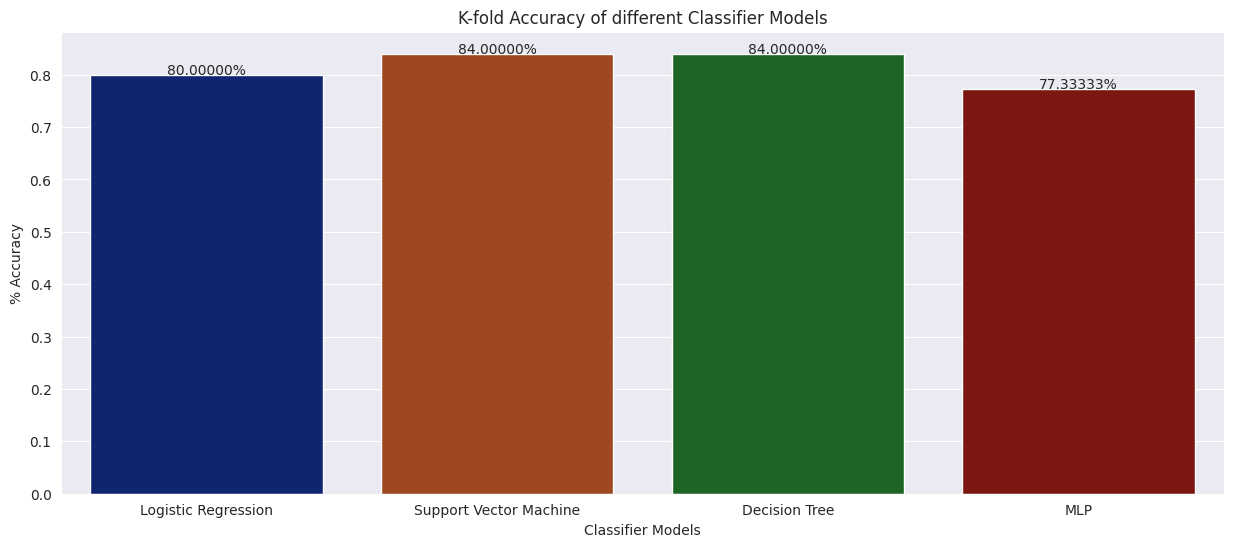

In [ ]:
model_names = ["Logistic Regression","Support Vector Machine","Decision Tree","MLP"]
ax = sns.barplot(x=model_names, y=score_list_kf, palette = "dark")
plt.xlabel("Models")
plt.ylabel("% Accuracy")
plt.title("K-fold Accuracy of different Classifier Models")

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.05%}', (x + width/2, y + height), ha='center')
plt.show()

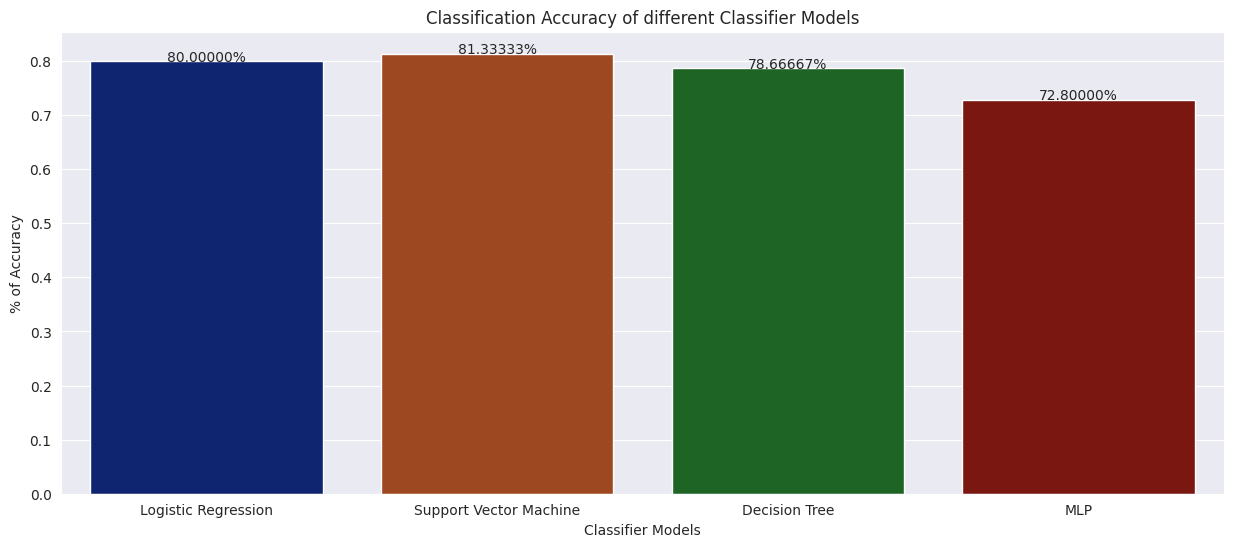

In [ ]:
model_names = ["Logistic Regression","Support Vector Machine","Decision Tree","MLP"]
ax = sns.barplot(x=model_names, y=score_list_ca, palette = "dark")
plt.xlabel("Models")
plt.ylabel("% of Accuracy")
plt.title("Classification Accuracy of different Classifier Models")

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.05%}', (x + width/2, y + height), ha='center')
plt.show()